<a href="https://colab.research.google.com/github/BragadeeshSellappaRS/Sports-managent/blob/main/Customer_segmentation22csa19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("mall_customers.csv")
"""Importing the necassary library function to display the data set of customers visit a mall"""

'Importing the necassary library function to display the data set of customers visit a mall'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

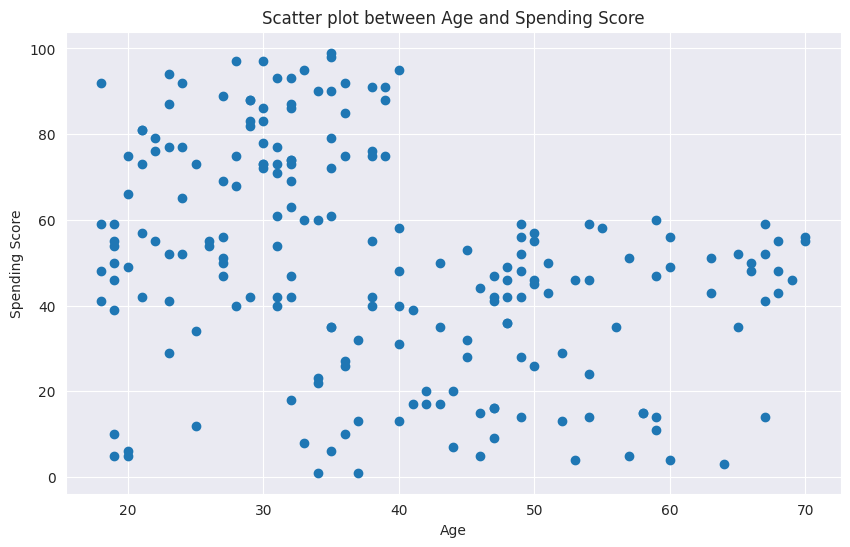

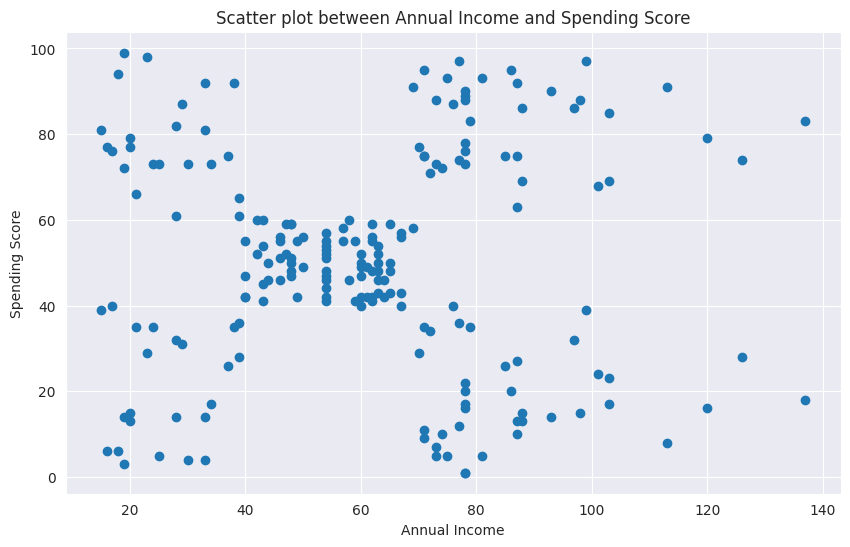

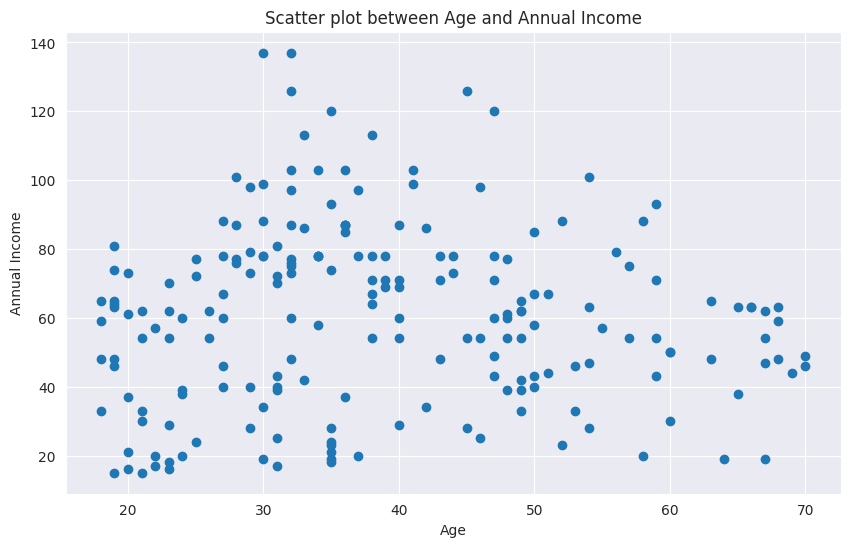

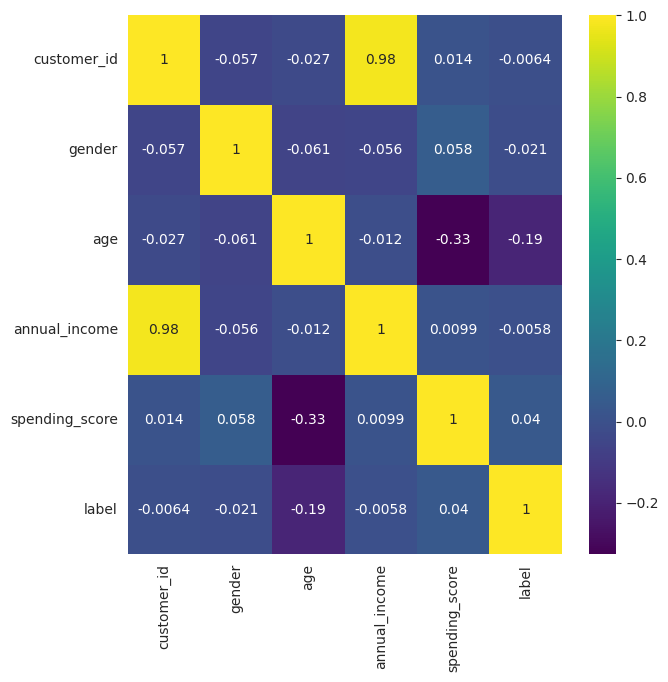

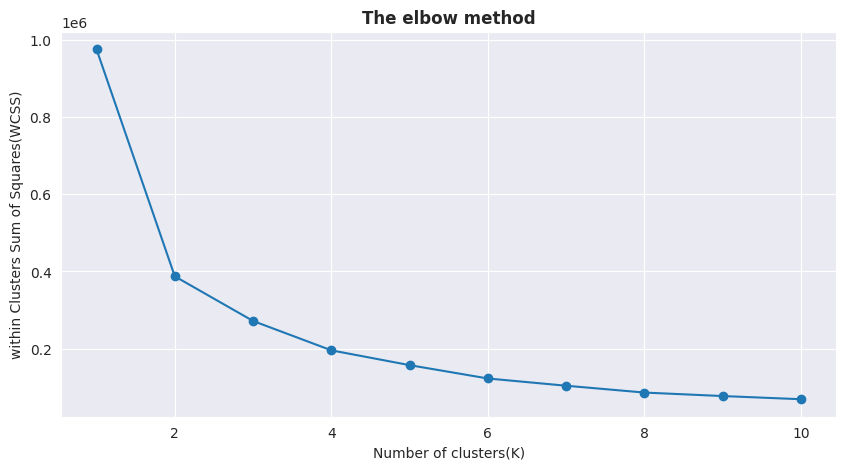

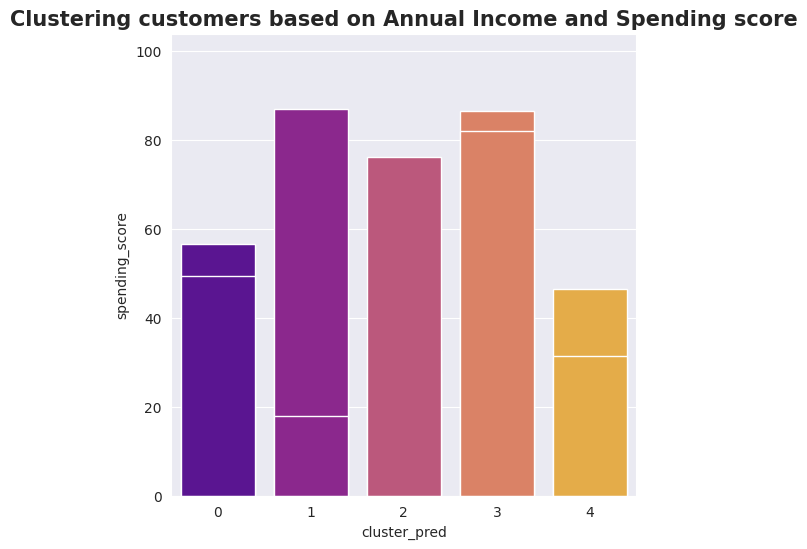

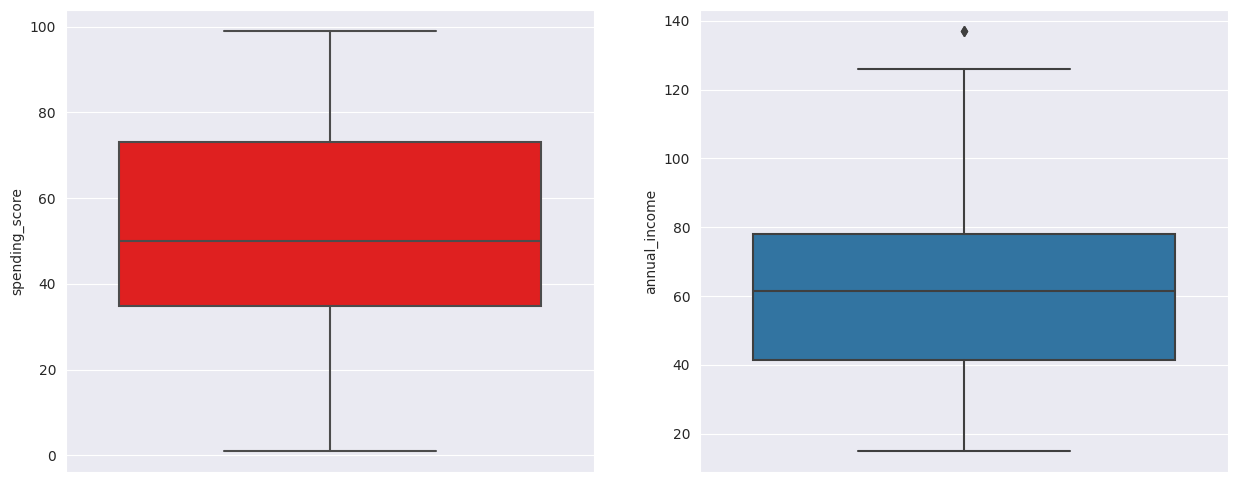

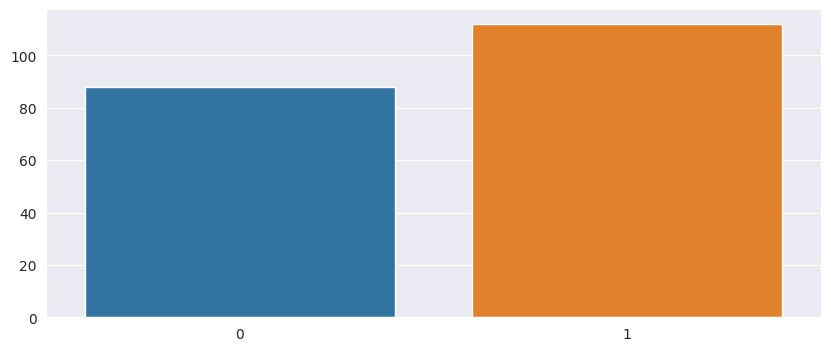

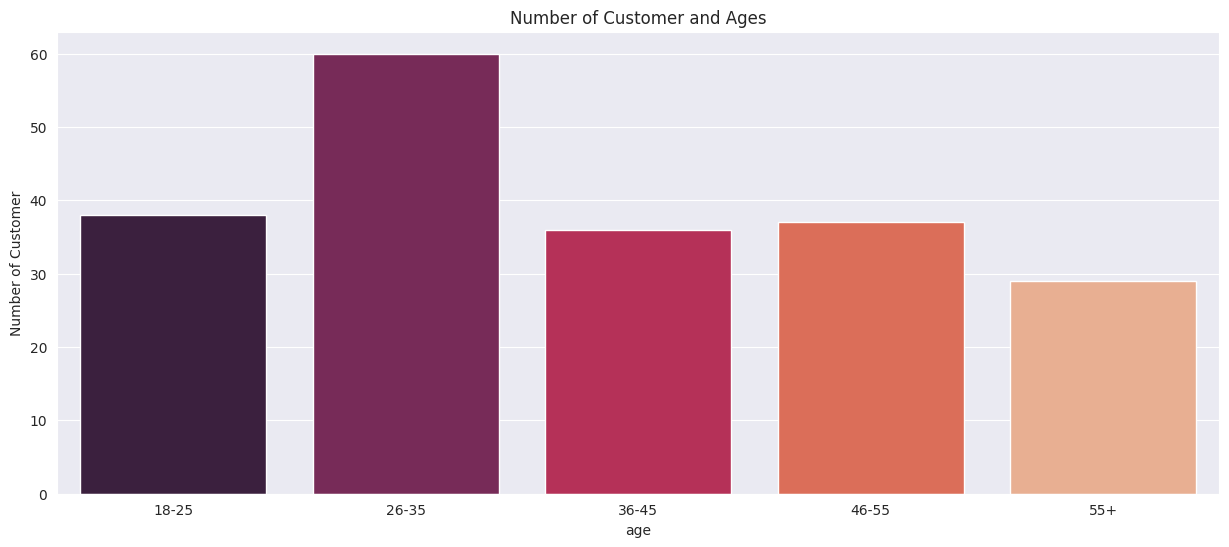

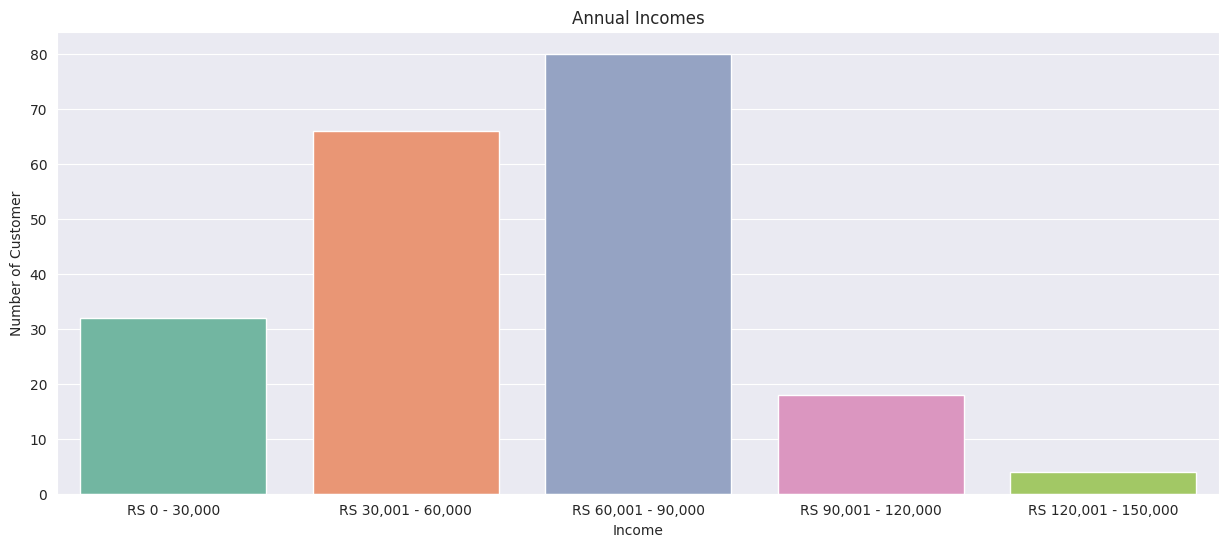

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


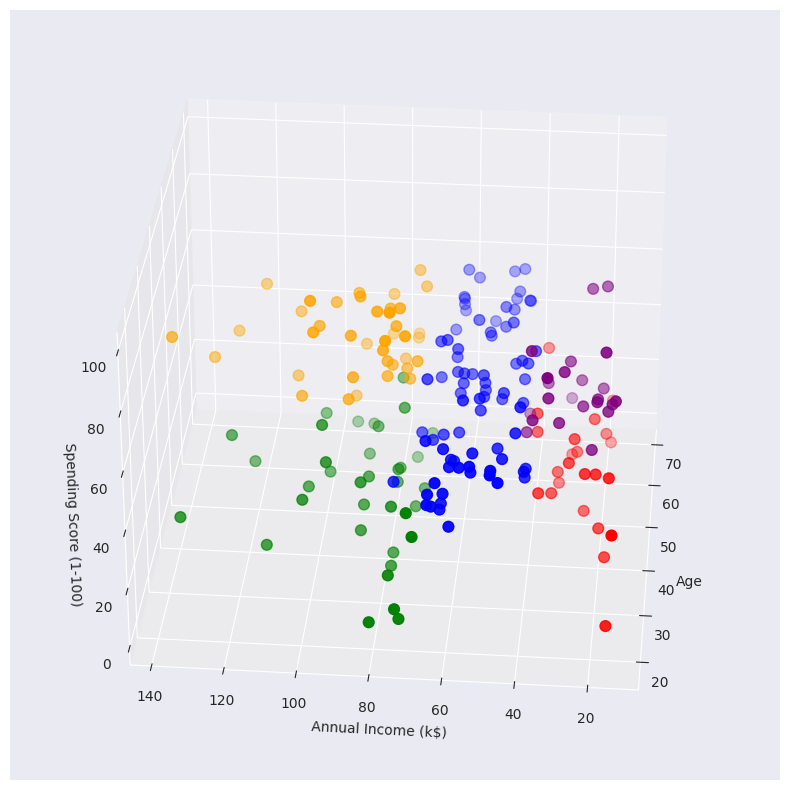

In [23]:
def categorical_gender(df):
    df['gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
    return df
categorical_gender(df)


#Scatter plot
def age_vs_spending_score(df):
    plt.figure(figsize=(10,6))
    plt.scatter(df['age'],df['spending_score'], marker='o');
    plt.xlabel('Age')
    plt.ylabel('Spending Score')
    plt.title('Scatter plot between Age and Spending Score')
    return plt
age_vs_spending_score(df)
"""Displaying the scatter plot of the age and spending score shows the majority of the customers with their spending"""

def annualincome_vs_spendingscore(df):
    plt.figure(figsize=(10,6))
    plt.scatter(df['annual_income'],df['spending_score'], marker='o');
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Scatter plot between Annual Income and Spending Score')
    return plt
annualincome_vs_spendingscore(df)

def age_vs_annualincome(df):
    plt.figure(figsize=(10,6))
    plt.scatter(df['age'],df['annual_income'], marker='o');
    plt.xlabel('Age')
    plt.ylabel('Annual Income')
    plt.title('Scatter plot between Age and Annual Income')
    return plt
age_vs_annualincome(df)

#Heat map
def corr(df):
    fig_dims = (7, 7)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(df.corr(), annot=True, cmap='viridis')
    return sns
corr(df)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age', 'annual_income', 'spending_score']])

#Elbow and display cluster

def elbow(df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        max_iter=300, n_init=10, random_state=42)
        x = df.copy()
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)

    plt.figure(figsize=(10, 5))
    no_clusters = range(1, 11)
    plt.plot(no_clusters, wcss, marker="o")
    plt.title('The elbow method', fontweight="bold")
    plt.xlabel('Number of clusters(K)')
    plt.ylabel('within Clusters Sum of Squares(WCSS)')
    return plt
elbow(df)


def clustering_new(df):


    x = df.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)

    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    gender= {0:'Male',1:'Female'}
    clusters_new['gender']= clusters_new['gender'].map(gender)
    plt.figure(figsize=(6,6))
    plt.scatter(clusters_new['annual_income'],clusters_new['spending_score'],c=clusters_new['cluster_pred'],cmap='rainbow')
    plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    return plt
clustering_new(df)


def barplot_age(df):
    x = df.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)
    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
    sns.barplot(x='cluster_pred',y='age',palette="plasma",data=avg_data)
    return sns
barplot_age(df)

def barplot_annualincome(df):

    x = df.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)
    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
    sns.barplot(x='cluster_pred', y='annual_income', palette="plasma", data=avg_data)
    return sns
barplot_annualincome(df)

def barplot_spendingscore(df):
    x = df.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)
    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
    sns.barplot(x='cluster_pred',y='spending_score',palette="plasma",data=avg_data)
    return sns
barplot_spendingscore(df)
KMeans(df)

data=df

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["spending_score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["annual_income"])
plt.show()


genders = data.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

age18_25 = data.age[(data.age <= 25) & (data.age >= 18)]
age26_35 = data.age[(data.age <= 35) & (data.age >= 26)]
age36_45 = data.age[(data.age <= 45) & (data.age >= 36)]
age46_55 = data.age[(data.age <= 55) & (data.age >= 46)]
age55above = data.age[data.age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),
len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("age")
plt.ylabel("Number of Customer")
plt.show()

income0_30 = data["annual_income"][(data["annual_income"] >= 0) & (data["annual_income"] <= 30)]
income31_60 = data["annual_income"][(data["annual_income"] >= 31) & (data["annual_income"] <= 60)]
income61_90 = data["annual_income"][(data["annual_income"] >= 61) & (data["annual_income"] <= 90)]
income91_120 = data["annual_income"][(data["annual_income"] >= 91) & (data["annual_income"] <= 120)]
income121_150 = data["annual_income"][(data["annual_income"] >= 121) & (data["annual_income"] <= 150)]

x1 = ["RS 0 - 30,000", "RS 30,001 - 60,000", "RS 60,001 - 90,000", "RS 90,001 - 120,000", "RS 120,001 - 150,000"]
y1 = [len(income0_30.values), len(income31_60.values), len(income61_90.values), len(income91_120.values), len(income121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x1, y=y1, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.age[data.label == 0], data["annual_income"][data.label == 0], data["spending_score"][data.label == 0], c='blue', s=60)
ax.scatter(data.age[data.label == 1], data["annual_income"][data.label == 1], data["spending_score"][data.label == 1], c='red', s=60)
ax.scatter(data.age[data.label == 2], data["annual_income"][data.label == 2], data["spending_score"][data.label == 2], c='green', s=60)
ax.scatter(data.age[data.label == 3], data["annual_income"][data.label == 3], data["spending_score"][data.label == 3], c='orange', s=60)
ax.scatter(data.age[data.label == 4], data["annual_income"][data.label == 4], data["spending_score"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score (1-100)')
plt.show()